# Ariane 5 Failure: Learning Programming Through a Real Story

## Introduction

In 1996, the European Space Agency's Ariane 5 rocket exploded just 37 seconds after launch. The cause? A software bug—specifically, an **integer overflow**. This dramatic failure teaches us the importance of understanding how computers handle data. In this notebook, you'll explore core programming concepts while investigating what went wrong with Ariane 5.

## 🧠 Section 1: Primitive Data Types

In programming, data types determine what kind of information a variable can store. In Python, there are four commonly used **primitive** data types:

- `int` (integer): whole numbers like 10, -5, or 0
- `float`: numbers with decimals like 3.14 or -0.001
- `str` (string): sequences of characters like "Ariane" or "Lift off!"
- `bool` (boolean): either `True` or `False`

We'll use these to describe different properties of a rocket.

Run the cell below by clicking 'Shift + Enter' or the run button next to the cell. See what input the cell gives.

In [ ]:
# Primitive data types in action
rocket_stage = 2            # int
fuel_remaining = 83.7       # float
mission_name = "Ariane 5"   # str
is_ready = True             # bool

print("Stage:", rocket_stage)
print("Fuel Remaining (%):", fuel_remaining)
print("Mission:", mission_name)
print("Ready for launch:", is_ready)

### Code Example:

### 🚀 Exercise 1
Create variables to represent the following:
- The total number of engines on the rocket (integer)
- The rocket's initial vertical speed in m/s (float)
- The rocket's code name (string)
- Whether the rocket has launched (boolean)

In [ ]:
### Create your variables here

### 🚀 Exercise 2
Print each of your variables using `print()` and describe what type each one is.

In [ ]:
#### Use your print statements to display the values of your variables

## ➕ Section 2: Operations with Data Types

Now that you know what data types are, let's do things with them. You can:

- Add, subtract, multiply, and divide numbers
- Combine strings (called **concatenation**)
- Use logic with booleans

These operations help us simulate real-world rocket physics.

Run the cell below to get the idea of the operations. Remember, you can click 'Shift + Enter' to run the cell or just click the run button next to the cell.

In [ ]:
acceleration = 30  # m/s^2
launch_time = 5    # seconds
final_speed = acceleration * launch_time

print("Final Speed:", final_speed, "m/s")

# Combining strings
status = "Mission " + mission_name + " is " + ("ready" if is_ready else "not ready")
print(status)

### 🚀 Exercise 1
If the rocket accelerates at 25 m/s² for 12 seconds, calculate and print the final speed. First, do this on paper and then see if you can code the answer as well. Visualize your answer with printing it.

In [ ]:
### All of your operations here

### 🚀 Exercise 2
Create a message that includes the mission name, number of engines, and fuel remaining. Use string concatenation and `str()` to convert numbers.

In [ ]:
mission_name = ### Name here
no_engines = ### Number of engines here
fuel_remaining = ### Fuel percentage here

message = f"Mission {mission_name} with {no_engines} engines has {fuel_remaining}% fuel remaining."
print(message)

## 🧩 Section 3: Functions

A **function** is a block of code that performs a task. Functions help us avoid repeating code and make programs easier to read. For example, below is an implementation of a function that computes he velocity by multiplying acceleration with time. This comes in handy when we want to do multiple operations with data.


In [ ]:
def compute_velocity(acceleration, time):
    return acceleration * time

print("Velocity after 10 seconds:", compute_velocity(20, 10), "m/s")


### 🚀 Exercise
Write a function called `compute_distance` that takes speed and time as inputs and returns the distance traveled. Try it out with some example values.

In [ ]:
## Write your function here and test it

## 🧨 Section 4: Integer Overflow

The Ariane 5 software used a 16-bit signed integer to store a number that became too large during flight. This caused the number to "wrap around" into a negative value, leading to system failure.

In Python, this doesn't usually happen due to automatic handling of large numbers. But we can simulate what went wrong using NumPy, which mimics real-world hardware limitations.

Run the cell below and see what is happening. What does the error message say? What does it mean that the number is out of bounds for 'int16'?


In [2]:
import numpy as np

# Simulating a 16-bit integer overflow
value = np.int16(33000)
print("Before overflow:", value)
value += 1000
print("After overflow:", value)  # Unexpected result!

OverflowError: Python integer 33000 out of bounds for int16

### 🚀 Exercise 1
Set the value to 32000 and add 2000. What is the result? Why?

In [ ]:
import numpy as np

# Simulating a 16-bit integer overflow
set_value = ### Set your value here

value = np.int16(set_value)
print("Before overflow:", value)
value += 1000
print("After overflow:", value)  # Unexpected result!

### 🚀 Exercise 2
Set the value to -32000 and subtract 2000. What happens now?

> 💡 *Think about what would happen in a rocket's guidance system if such a number were used for speed or position!*

In [ ]:
import numpy as np

# Simulating a 16-bit integer overflow
set_value = ### Set your value here

value = np.int16(set_value)
print("Before overflow:", value)
value -= 2000
print("After overflow:", value)  # Unexpected result!

## 🎥 Section 5: Ariane 5 Visualization

Now let’s see what this kind of error might look like in action. Click the button below to run a **rocket simulation**. The rocket will launch normally—until a hidden integer overflow causes it to behave unexpectedly.

You don’t need to read or modify this code—just observe what happens.

TIME: 5.1s - Integer overflow detected! Velocity wraps from 33000 to overflow.


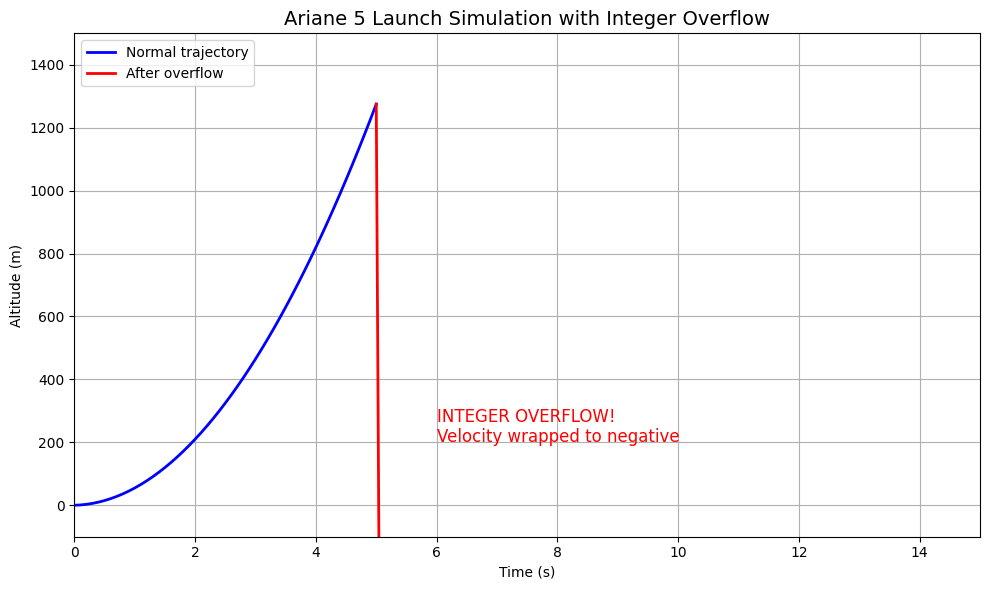


What happened: The rocket's velocity exceeded the maximum value that could be stored in a 16-bit integer.
This caused an integer overflow, making the velocity suddenly become negative.
In the real Ariane 5 failure, this unexpected negative value caused the guidance system to fail.


In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize variables
y_sim = 0
t_sim = 0
dt = 0.1
v_sim = 0
a = 100  # m/s^2
overflow_triggered = False
x_data = [0]
y_data = [0]

# Simulate the rocket trajectory
for i in range(150):
    t_sim += dt
    
    # Check for overflow condition
    if t_sim > 5 and not overflow_triggered:
        print(f"TIME: {t_sim:.1f}s - Integer overflow detected! Velocity wraps from 33000 to overflow.")
        try:
            v_sim = np.int16(33000)  # Set to almost max value
            v_sim += 6000  # This should trigger overflow
        except OverflowError:
            # This will execute if an overflow error is raised
            v_sim = -31959
        finally:
            # This will always execute
            overflow_triggered = True
    else:
        v_sim += a * dt
        
    # Update position
    y_sim += v_sim * dt
    
    # Store data
    x_data.append(t_sim)
    y_data.append(y_sim)

# Setup the plot
ax.set_xlim(0, 15)
ax.set_ylim(-100, 1500)
ax.set_title("Ariane 5 Launch Simulation with Integer Overflow", fontsize=14)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Altitude (m)")
ax.grid(True)

# Find the split point
split_idx = next((i for i, x in enumerate(x_data) if x > 5), None)

# Plot normal trajectory
ax.plot(x_data[:split_idx], y_data[:split_idx], 'b-', linewidth=2, label="Normal trajectory")

# Plot trajectory after overflow
ax.plot(x_data[split_idx-1:], y_data[split_idx-1:], 'r-', linewidth=2, label="After overflow")

# Mark the rocket's final position
ax.plot(x_data[-1], y_data[-1], 'ro', markersize=10)

# Add overflow text
ax.text(6, 200, "INTEGER OVERFLOW!\nVelocity wrapped to negative", fontsize=12, color='red')

# Add legend
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

# Print explanation
print("\nWhat happened: The rocket's velocity exceeded the maximum value that could be stored in a 16-bit integer.")
print("This caused an integer overflow, making the velocity suddenly become negative.")
print("In the real Ariane 5 failure, this unexpected negative value caused the guidance system to fail.")

## 🎓 Conclusion

You've just explored how small mistakes in programming—like using the wrong data type—can lead to massive failures. Ariane 5 teaches us that even in space exploration, understanding basics like data types, functions, and overflow is critical.

Want to go further? Try rewriting this simulation to prevent the overflow!